In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

In [2]:
# Parameters
m = 8
L = 20
dx = L / m
n = m * m

In [3]:
e0 = np.zeros(n)
e1 = np.ones(n)
e2 = np.ones(n)
e4 = np.zeros(n)

for j in range(1, m+1):
    e2[m*j - 1] = 0 
    e4[m*j - 1] = 1

# Adjusted vectors for diagonals
e3 = np.zeros_like(e2)
e3[1:n] = e2[0:n-1]
e3[0] = e2[n-1]

e5 = np.zeros_like(e4)
e5[1:n] = e4[0:n-1]
e5[0] = e4[n-1]

In [4]:
e1.flatten()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [5]:
# Construct Matrix A (Laplacian)
diagonals_A = [e1, e1, e5, e2, -4 * e1, e3, e4, e1, e1]
offsets_A = [-(n - m), -m, -m + 1, -1, 0, 1, m - 1, m, (n - m)]
A = spdiags(diagonals_A, offsets_A, n, n) / dx**2

# Construct Matrix B (Partial derivative with respect to x)
diagonals_B = [e1, -e1, e1, -e1]
offsets_B = [-(n - m),-m, m, (n - m)]
B = spdiags(diagonals_B, offsets_B, n, n) / (2 * dx)

# Construct Matrix C (Partial derivative with respect to y)
diagonals_C = [e5, -e2, e3, -e4]
offsets_C = [-m + 1, -1, 1, m - 1]
C = spdiags(diagonals_C, offsets_C, n, n) / (2 * dx)

A1 = A.toarray()
A2 = B.toarray()
A3 = C.toarray()



In [12]:
B2 = np.dot(A2,A2)
C2 = np.dot(A3,A3)
B2+C2

difference = np.abs(A - B2+C2)

print("Maximum difference between A and B^2 + C^2:", np.max(difference))
print("Average difference between A and B^2 + C^2:", np.mean(difference))

Maximum difference between A and B^2 + C^2: 0.6400000000000001
Average difference between A and B^2 + C^2: 0.022500000000000006


Matrix A (Laplacian):
 [[-0.64  0.16  0.   ...  0.    0.    0.  ]
 [ 0.16 -0.64  0.16 ...  0.    0.    0.  ]
 [ 0.    0.16 -0.64 ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ... -0.64  0.16  0.  ]
 [ 0.    0.    0.   ...  0.16 -0.64  0.16]
 [ 0.    0.    0.   ...  0.    0.16 -0.64]]

Matrix B (∂/∂x):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Matrix C (∂/∂y):
 [[ 0.   0.2  0.  ...  0.   0.   0. ]
 [-0.2  0.   0.2 ...  0.   0.   0. ]
 [ 0.  -0.2  0.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  0.   0.2  0. ]
 [ 0.   0.   0.  ... -0.2  0.   0.2]
 [ 0.   0.   0.  ...  0.  -0.2  0. ]]


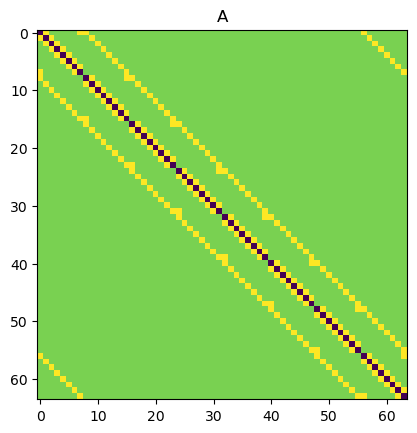

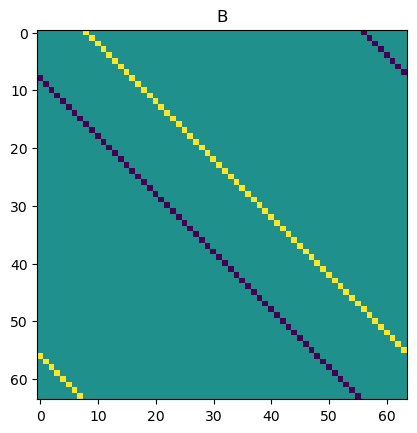

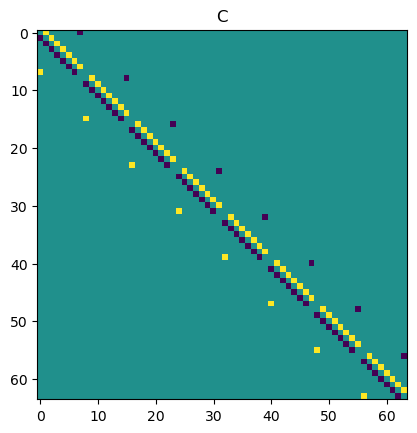

In [8]:
print("Matrix A (Laplacian):\n", A1)
print("\nMatrix B (∂/∂x):\n", A2)
print("\nMatrix C (∂/∂y):\n", A3)

#Plot matrix structures
plt.imshow(A1)
plt.title('A')
plt.show()

plt.imshow(A2)
plt.title('B')
plt.show()

plt.imshow(A3)
plt.title('C')
plt.show()